In [33]:
import numpy as np
from math import exp, log
import matplotlib.pyplot as plt
from tqdm import tqdm

In [62]:
def epsilon_to_alpha(epsilon, distance, pi, precision=1e-15):

    ldp_max_p = 0
    for v in range(d):
        for y in range(d):
            p_mat = np.full(d, 1/(exp(epsilon) + d - 1))
            p_mat[y] = exp(epsilon)/(exp(epsilon) + d - 1)
            ldp_p = (pi[v]*p_mat[y])/np.dot(pi, p_mat)
            if ldp_p > ldp_max_p:
                ldp_max_p = ldp_p
    if ldp_max_p == 1:
        print('Reaching the probability boundary.')
        return

    l = 0
    r = epsilon
    cldp_max_p = 0
    while (cldp_max_p > ldp_max_p) or (r - l >= precision):
        alpha = (l + r)/2
        cldp_max_p = 0
        for v in range(d):
            for y in range(d):
                p_mat = np.exp(-alpha*distance[:, y]/2)
                p_mat /= p_mat.sum()
                cldp_p = (pi[v]*p_mat[y])/np.dot(pi, p_mat)
                if cldp_p > cldp_max_p:
                    cldp_max_p = cldp_p
        if cldp_max_p == ldp_max_p:
            break
        elif cldp_max_p < ldp_max_p:
            l = alpha
        else:
            r = alpha

    return alpha

In [63]:
def alpha_to_epsilon(alpha, distance, pi, precision=1e-15):

    cldp_max_p = 0
    for v in range(d):
        for y in range(d):
            p_mat = np.exp(-alpha*np.abs(np.arange(d) - y)/2)
            p_mat /= p_mat.sum()
            cldp_p = (pi[v]*p_mat[y])/np.dot(pi, p_mat)
            if cldp_p > cldp_max_p:
                cldp_max_p = cldp_p

    l = 0
    r = 50
    ldp_max_p = 0
    while (cldp_max_p > ldp_max_p) or (r - l >= precision):
        epsilon = (l + r)/2
        ldp_max_p = 0
        for v in range(d):
            for y in range(d):
                p_mat = np.full(d, 1/(exp(epsilon) + d - 1))
                p_mat[y] = exp(epsilon)/(exp(epsilon) + d - 1)
                ldp_p = (pi[v]*p_mat[y])/np.dot(pi, p_mat)
                if ldp_p > ldp_max_p:
                    ldp_max_p = ldp_p
        if ldp_max_p == 1:
            print('Reaching the probability boundary.')
            return
        if cldp_max_p == ldp_max_p:
            break
        elif cldp_max_p < ldp_max_p:
            r = epsilon
        else:
            l = epsilon

    return epsilon

## 1-Dimension

In [65]:
d = 100
pi = np.full(d, 1/d)

universe = np.arange(d)
distance = np.zeros((d, d))
for i in range(d):
    distance[i] = np.abs(i - universe)

## 2-Dimention

In [75]:
import pandas as pd

d = 900
pi = np.full(d, 1/d)

loc = pd.read_csv('../T-drive/release/xy_loc.csv')

distance = np.zeros((d, d))
for i in range(d):
    distance[i] = np.sqrt(np.square(loc.iloc[i]['x'] - loc['x'].to_numpy()) + np.square(loc.iloc[i]['y'] - loc['y'].to_numpy()))

## Epsilon to alpha

In [76]:
epsilon_range = np.arange(1, 11, 1)
alpha_range = []
for epsilon in tqdm(epsilon_range):
    alpha_range.append(epsilon_to_alpha(epsilon, distance, pi))
x = epsilon_range
plt.plot(x, alpha_range, 'D-', markersize=10, markerfacecolor='none', markeredgewidth=2.5, color='deepskyblue')
plt.xticks(x)
plt.xlabel('Epsilon')
plt.ylabel('Alpha')
plt.grid(linestyle='-.')
plt.show()

  0%|          | 0/10 [04:58<?, ?it/s]


KeyboardInterrupt: 

## Alpha to epsilon

100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


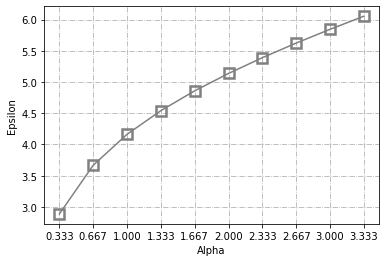

In [66]:
alpha_range = np.arange(1/3, 11/3, 1/3)
epsilon_range = []
for alpha in tqdm(alpha_range):
    epsilon_range.append(alpha_to_epsilon(alpha, distance, pi))
x = alpha_range
plt.plot(x, epsilon_range, 's-', markersize=10, markerfacecolor='none', markeredgewidth=2.5, label='LDP', color='grey')
plt.xticks(x)
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.grid(linestyle='-.')
plt.show()

In [7]:
import pandas as pd

d = 900
pi = np.full(d, 1/d)

alpha = 0.1/100

loc = pd.read_csv('../T-drive/release/xy_loc.csv')

dist_mat = np.zeros((d, d))
for i in range(d):
    dist_mat[i] = np.sqrt(np.square(loc.iloc[i]['x'] - loc['x'].to_numpy()) + np.square(loc.iloc[i]['y'] - loc['y'].to_numpy()))
p_mat = np.exp(-alpha*dist_mat/2)
for i in range(d):
    p_mat[i] /= p_mat[i].sum()

cldp_max_p = 0
for v in range(d):
    for y in range(d):
        cldp_p = (pi[v]*p_mat[v][y])/np.dot(pi, p_mat[y])
        if cldp_p > cldp_max_p:
            cldp_max_p = cldp_p

l = 0
r = 50
ldp_max_p = 0
while (cldp_max_p > ldp_max_p) or (r - l > 1e-5):
    epsilon = (l + r)/2
    ldp_max_p = 0
    for v in range(d):
        for y in range(d):
            p_mat = np.full(d, 1/(exp(epsilon) + d - 1))
            p_mat[y] = exp(epsilon)/(exp(epsilon) + d - 1)
            ldp_p = (pi[v]*p_mat[y])/np.dot(pi, p_mat)
            if ldp_p > ldp_max_p:
                ldp_max_p = ldp_p
    print(epsilon, cldp_max_p, ldp_max_p)
    if cldp_max_p == ldp_max_p:
        break
    elif cldp_max_p < ldp_max_p:
        r = epsilon
    else:
        l = epsilon

print(epsilon)

25.0 0.08714986565619579 0.9999999875147395
12.5 0.08714986565619579 0.9966609255698144
6.25 0.08714986565619579 0.36556678644710605
3.125 0.08714986565619579 0.024691782767590886
4.6875 0.08714986565619579 0.1077643832743044
3.90625 0.08714986565619579 0.05239964479883697
4.296875 0.08714986565619579 0.07554973759531992
4.4921875 0.08714986565619579 0.09037246900845057
4.39453125 0.08714986565619579 0.08265928603132484
4.443359375 0.08714986565619579 0.08643801507747823
4.4677734375 0.08714986565619579 0.08838547400153018
4.45556640625 0.08714986565619579 0.08740684037536114
4.449462890625 0.08714986565619579 0.08692120641311757
4.4525146484375 0.08714986565619579 0.08716371747510478
4.45098876953125 0.08714986565619579 0.08704238553818908
4.451751708984375 0.08714986565619579 0.08710303239593437
4.4521331787109375 0.08714986565619579 0.08713337015668735
4.452323913574219 0.08714986565619579 0.08714854262104375
4.452419281005859 0.08714986565619579 0.08715612974934314
4.45237159729003